<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/sprinkler_pgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directed graphical models

We illustrate some basic properties of DGMs.

In [17]:
!pip install  causalgraphicalmodels
!pip install pgmpy

     |████████████████████████████████| 337kB 8.0MB/s 


In [40]:
from causalgraphicalmodels import CausalGraphicalModel
import pgmpy
import numpy as np
import pandas as pd

# Make the model

In [33]:
sprinkler = CausalGraphicalModel(
    nodes=["cloudy", "rain", "sprinkler", "wet", "slippery"],
    edges=[
        ("cloudy", "rain"), 
        ("cloudy", "sprinkler"), 
        ("rain", "wet"),
        ("sprinkler", "wet"), 
        ("wet", "slippery")
    ]
)



# Draw the model

In [35]:
# draw return a graphviz `dot` object, which jupyter can render
out = sprinkler.draw()

In [14]:
type(out)


graphviz.dot.Digraph

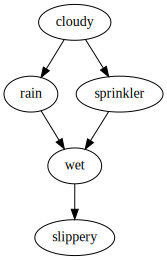

In [36]:
display(out)

In [37]:
out.render()  

'Digraph.gv.pdf'

# Display the factorization

In [4]:
print(sprinkler.get_distribution())

P(season)P(sprinkler|season)P(rain|season)P(wet|rain,sprinkler)P(slippery|wet)


# D-separation

In [38]:

# check for d-seperation of two nodes
sprinkler.is_d_separated("slippery", "cloudy", {"wet"})

True

# Extract CI relationships

In [41]:
# get all the conditional independence relationships implied by a CGM
CI = sprinkler.get_all_independence_relationships()
print(CI)

[('rain', 'sprinkler', {'cloudy'}), ('rain', 'slippery', {'wet'}), ('rain', 'slippery', {'sprinkler', 'wet'}), ('rain', 'slippery', {'cloudy', 'wet'}), ('rain', 'slippery', {'sprinkler', 'cloudy', 'wet'}), ('sprinkler', 'slippery', {'wet'}), ('sprinkler', 'slippery', {'rain', 'wet'}), ('sprinkler', 'slippery', {'cloudy', 'wet'}), ('sprinkler', 'slippery', {'rain', 'cloudy', 'wet'}), ('cloudy', 'slippery', {'wet'}), ('cloudy', 'slippery', {'rain', 'sprinkler'}), ('cloudy', 'slippery', {'rain', 'wet'}), ('cloudy', 'slippery', {'sprinkler', 'wet'}), ('cloudy', 'slippery', {'rain', 'sprinkler', 'wet'}), ('cloudy', 'wet', {'rain', 'sprinkler'}), ('cloudy', 'wet', {'slippery', 'rain', 'sprinkler'})]


In [45]:
records = []
for ci in CI:
  record = (ci[0], ci[1], ', '.join(x for x in ci[2]))
  records.append(record)

print(records)
df = pd.DataFrame(records, columns = ('X', 'Y', 'Z'))
display(df)

[('rain', 'sprinkler', 'cloudy'), ('rain', 'slippery', 'wet'), ('rain', 'slippery', 'sprinkler, wet'), ('rain', 'slippery', 'cloudy, wet'), ('rain', 'slippery', 'sprinkler, cloudy, wet'), ('sprinkler', 'slippery', 'wet'), ('sprinkler', 'slippery', 'rain, wet'), ('sprinkler', 'slippery', 'cloudy, wet'), ('sprinkler', 'slippery', 'rain, cloudy, wet'), ('cloudy', 'slippery', 'wet'), ('cloudy', 'slippery', 'rain, sprinkler'), ('cloudy', 'slippery', 'rain, wet'), ('cloudy', 'slippery', 'sprinkler, wet'), ('cloudy', 'slippery', 'rain, sprinkler, wet'), ('cloudy', 'wet', 'rain, sprinkler'), ('cloudy', 'wet', 'slippery, rain, sprinkler')]


,X,Y,Z
0,rain,sprinkler,cloudy
1,rain,slippery,wet
2,rain,slippery,"sprinkler, wet"
3,rain,slippery,"cloudy, wet"
4,rain,slippery,"sprinkler, cloudy, wet"
5,sprinkler,slippery,wet
6,sprinkler,slippery,"rain, wet"
7,sprinkler,slippery,"cloudy, wet"
8,sprinkler,slippery,"rain, cloudy, wet"
9,cloudy,slippery,wet


In [47]:
print(df.to_latex(index=False))

\begin{tabular}{lll}
\toprule
         X &          Y &                          Z \\
\midrule
      rain &  sprinkler &                     cloudy \\
      rain &   slippery &                        wet \\
      rain &   slippery &             sprinkler, wet \\
      rain &   slippery &                cloudy, wet \\
      rain &   slippery &     sprinkler, cloudy, wet \\
 sprinkler &   slippery &                        wet \\
 sprinkler &   slippery &                  rain, wet \\
 sprinkler &   slippery &                cloudy, wet \\
 sprinkler &   slippery &          rain, cloudy, wet \\
    cloudy &   slippery &                        wet \\
    cloudy &   slippery &            rain, sprinkler \\
    cloudy &   slippery &                  rain, wet \\
    cloudy &   slippery &             sprinkler, wet \\
    cloudy &   slippery &       rain, sprinkler, wet \\
    cloudy &        wet &            rain, sprinkler \\
    cloudy &        wet &  slippery, rain, sprinkler \\
\bottomru

# Inference

In [27]:


from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('C', 'S'), ('C', 'R'), ('S', 'W'), ('R', 'W'), ('W', 'L')])

# Defining individual CPDs.
cpd_c = TabularCPD(variable='C', variable_card=2, values=np.reshape([0.5, 0.5],(2,1)))

# In pgmpy the columns are the evidences and rows are the states of the variable.
 
cpd_s = TabularCPD(variable='S', variable_card=2, 
                   values=[[0.5, 0.9],
                           [0.5, 0.1]],
                  evidence=['C'],
                  evidence_card=[2])

cpd_r = TabularCPD(variable='R', variable_card=2, 
                   values=[[0.8, 0.2],
                           [0.2, 0.8]],
                  evidence=['C'],
                  evidence_card=[2])

cpd_w = TabularCPD(variable='W', variable_card=2, 
                   values=[[1.0, 0.1, 0.1, 0.01],
                           [0.0, 0.9, 0.9, 0.99]],
                  evidence=['S', 'R'],
                  evidence_card=[2, 2])

cpd_l = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.9, 0.1],
                           [0.1, 0.9]],
                  evidence=['W'],
                  evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w, cpd_l)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()




True

In [29]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

# p(R=1)= 0.5*0.2 + 0.5*0.8 = 0.5
probs = infer.query(['R']).values
print('\np(R=1) = ', probs[1])

# P(R=1|W=1) = 0.7079
probs = infer.query(['R'], evidence={'W': 1}).values
print('\np(R=1|W=1) = ', probs[1])


# P(R=1|W=1,S=1) = 0.3204
probs = infer.query(['R'], evidence={'W': 1, 'S': 1}).values
print('\np(R=1|W=1,S=1) = ', probs[1])

Eliminating: C: 100%|██████████| 2/2 [00:00<00:00, 517.24it/s]


p(R=1) =  0.5

p(R=1|W=1) =  0.7079276773296245

p(R=1|W=1,S=1) =  0.32038834951456313
